In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [96]:
df = pd.read_excel("./dataset/premiums_rest.xlsx")
df.sample(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
11656,53,Female,Southeast,Married,3,Obesity,Occasional,Salaried,<10L,1,Thyroid,Silver,23880
16221,44,Male,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,25L - 40L,31,No Disease,Silver,17586
27722,35,Male,Southeast,Married,3,Overweight,Regular,Salaried,10L - 25L,16,Diabetes,Gold,26558
1184,35,Female,Southeast,Unmarried,1,Overweight,Occasional,Self-Employed,25L - 40L,32,Thyroid,Silver,18548
18637,47,Male,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,26722


In [97]:
df["Genetical_Risk"] = 0

### EDA1

In [98]:
df.shape

(29904, 14)

In [99]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [100]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
25862,44,Male,Southwest,Unmarried,1,Underweight,Regular,Self-Employed,<10L,9,No Disease,Bronze,10303,0
29844,27,Female,Northwest,Married,3,Underweight,Occasional,Salaried,<10L,4,High blood pressure,Bronze,10791,0
1002,53,Male,Southwest,Married,3,Overweight,Regular,Salaried,10L - 25L,10,Diabetes,Gold,31159,0
2051,57,Female,Northwest,Married,2,Obesity,No Smoking,Salaried,10L - 25L,18,High blood pressure,Gold,30930,0
8151,37,Female,Southwest,Married,4,Normal,Occasional,Self-Employed,10L - 25L,13,Diabetes,Silver,16427,0


In [101]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [102]:
df = df.dropna()

In [103]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [104]:
df.shape

(29886, 14)

In [105]:
df.duplicated().sum()

0

In [106]:
df = df.drop_duplicates()

In [107]:
df.shape

(29886, 14)

In [108]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [109]:
df[df["number_of_dependants"] < 0]["number_of_dependants"].unique()

array([-1, -3], dtype=int64)

In [110]:
df["number_of_dependants"] = abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [111]:
numeric_columns = df.select_dtypes(["float64", "int64"]).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

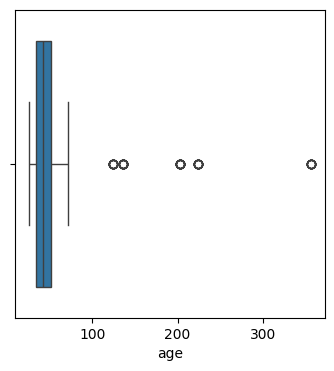

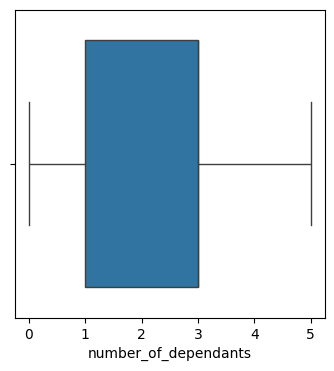

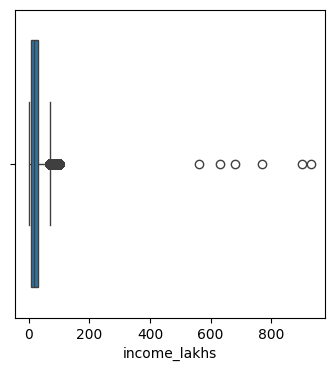

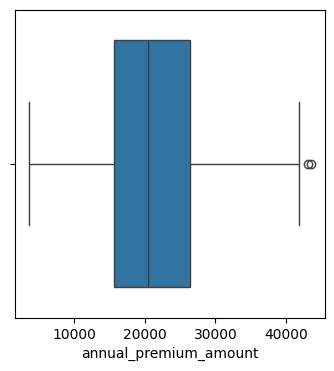

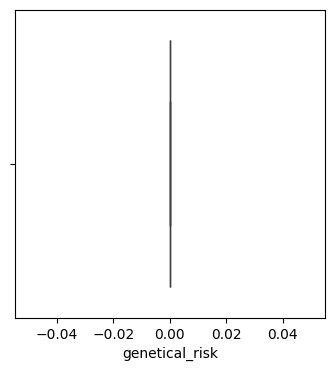

In [112]:
for col in numeric_columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(x = df[col])
    plt.show()

In [113]:
df[df["age"] > 100]["age"].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [114]:
df1 = df[df["age"] <= 100].copy()

In [115]:
df1.shape

(29828, 14)

In [116]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


In [117]:
def get_iqr_bounds(col):
    Q1, Q3 =  col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [118]:
get_iqr_bounds(df1["income_lakhs"])

(-30.5, 69.5)

In [119]:
quantile_threold = df1["income_lakhs"].quantile(0.999)
quantile_threold

100.0

In [120]:
df2 = df1[df1["income_lakhs"] <= quantile_threold].copy()
df2.shape

(29822, 14)

In [121]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


### EDA 2

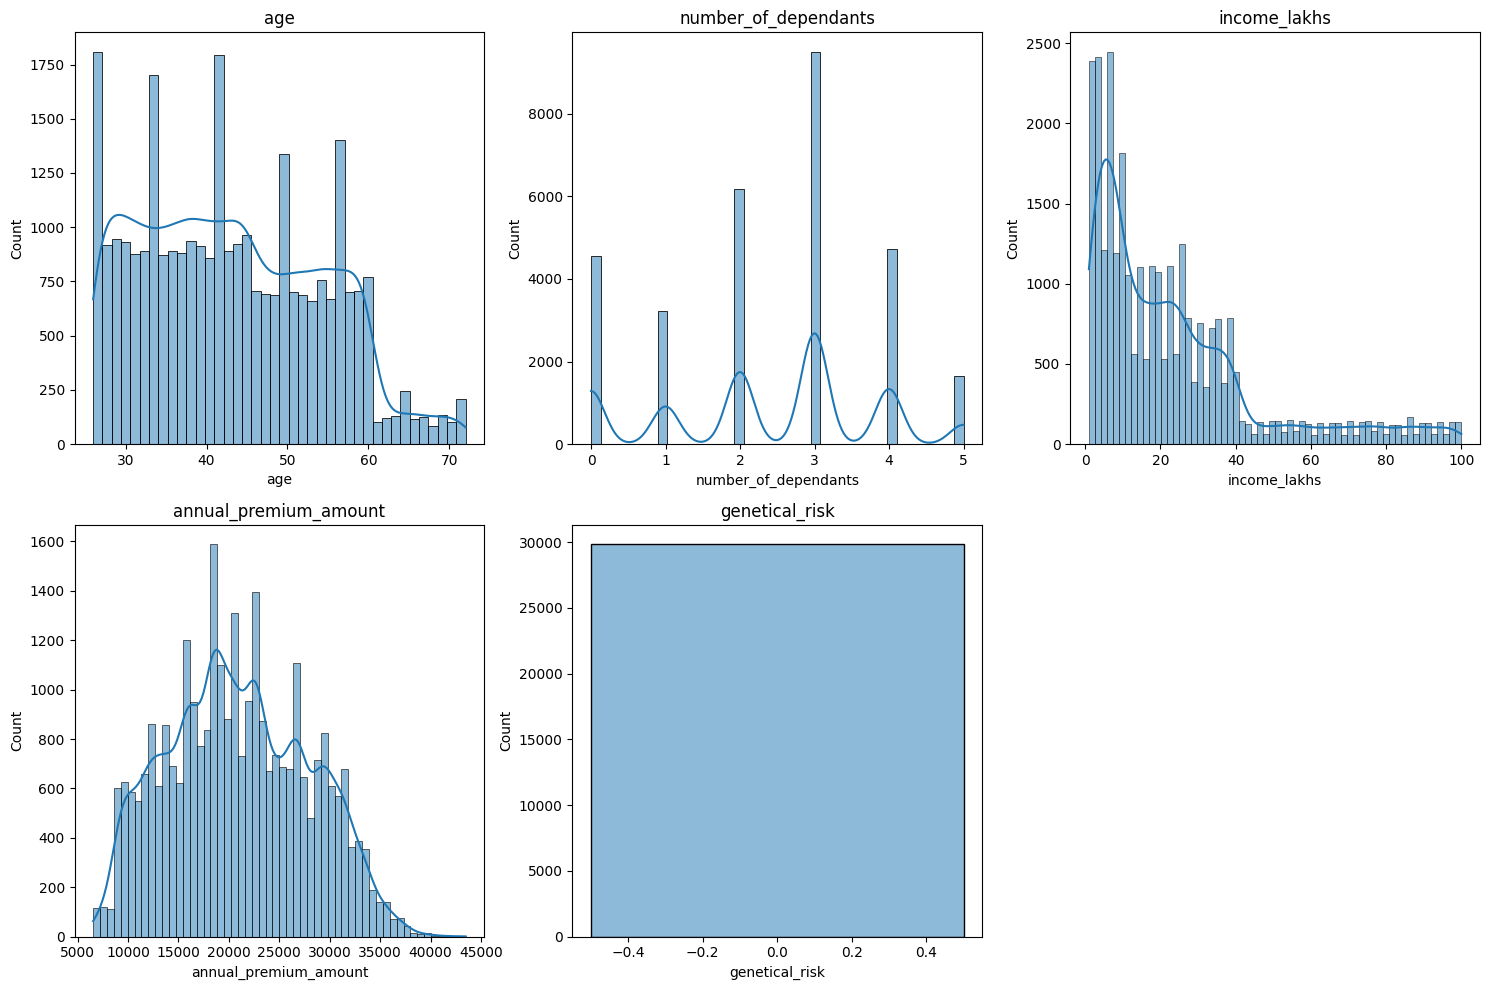

In [122]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize= (15, 10)) 


for i, col in enumerate(numeric_columns):
    ax = axs[i//3, i%3]
    sns.histplot(df2[col], kde=True, ax = ax)
    ax.set_title(col)

if len(numeric_columns) % 3 != 0:
    for j in range(len(numeric_columns), 6):
        axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

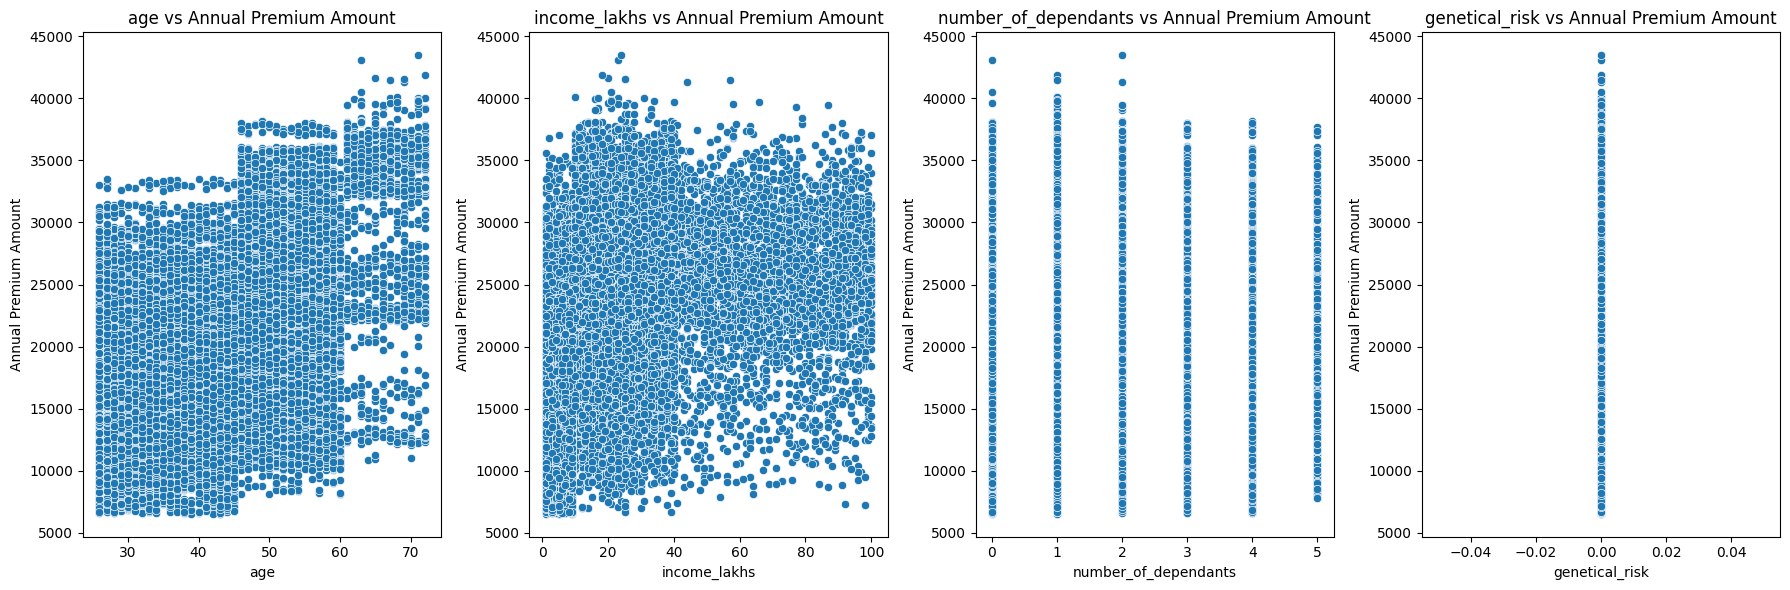

In [123]:
numeric_features = ["age", "income_lakhs", "number_of_dependants", "genetical_risk"]

fig, axes = plt.subplots(1, len(numeric_features), figsize= (18, 6))

for ax, col in zip(axes, numeric_features):
    sns.scatterplot(x = df2[col], y=df2["annual_premium_amount"], ax = ax)
    ax.set_title(f"{col} vs Annual Premium Amount")
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium Amount")

plt.tight_layout()
plt.show()

In [124]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [125]:
df2['smoking_status'] = df2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
})

df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [126]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


In [127]:
pct_count = df2['gender'].value_counts(normalize=True)*100
pct_count

gender
Male      54.912481
Female    45.087519
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

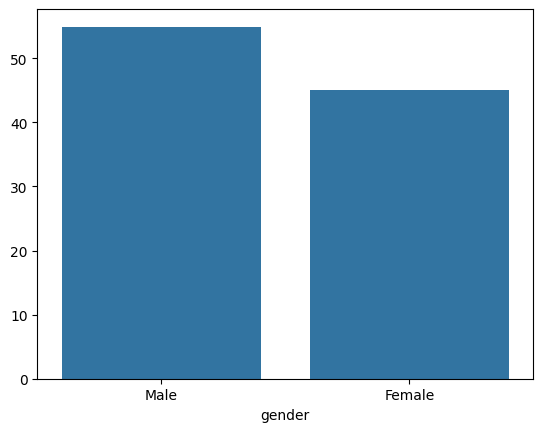

In [128]:
sns.barplot(x=pct_count.index, y=pct_count.values)

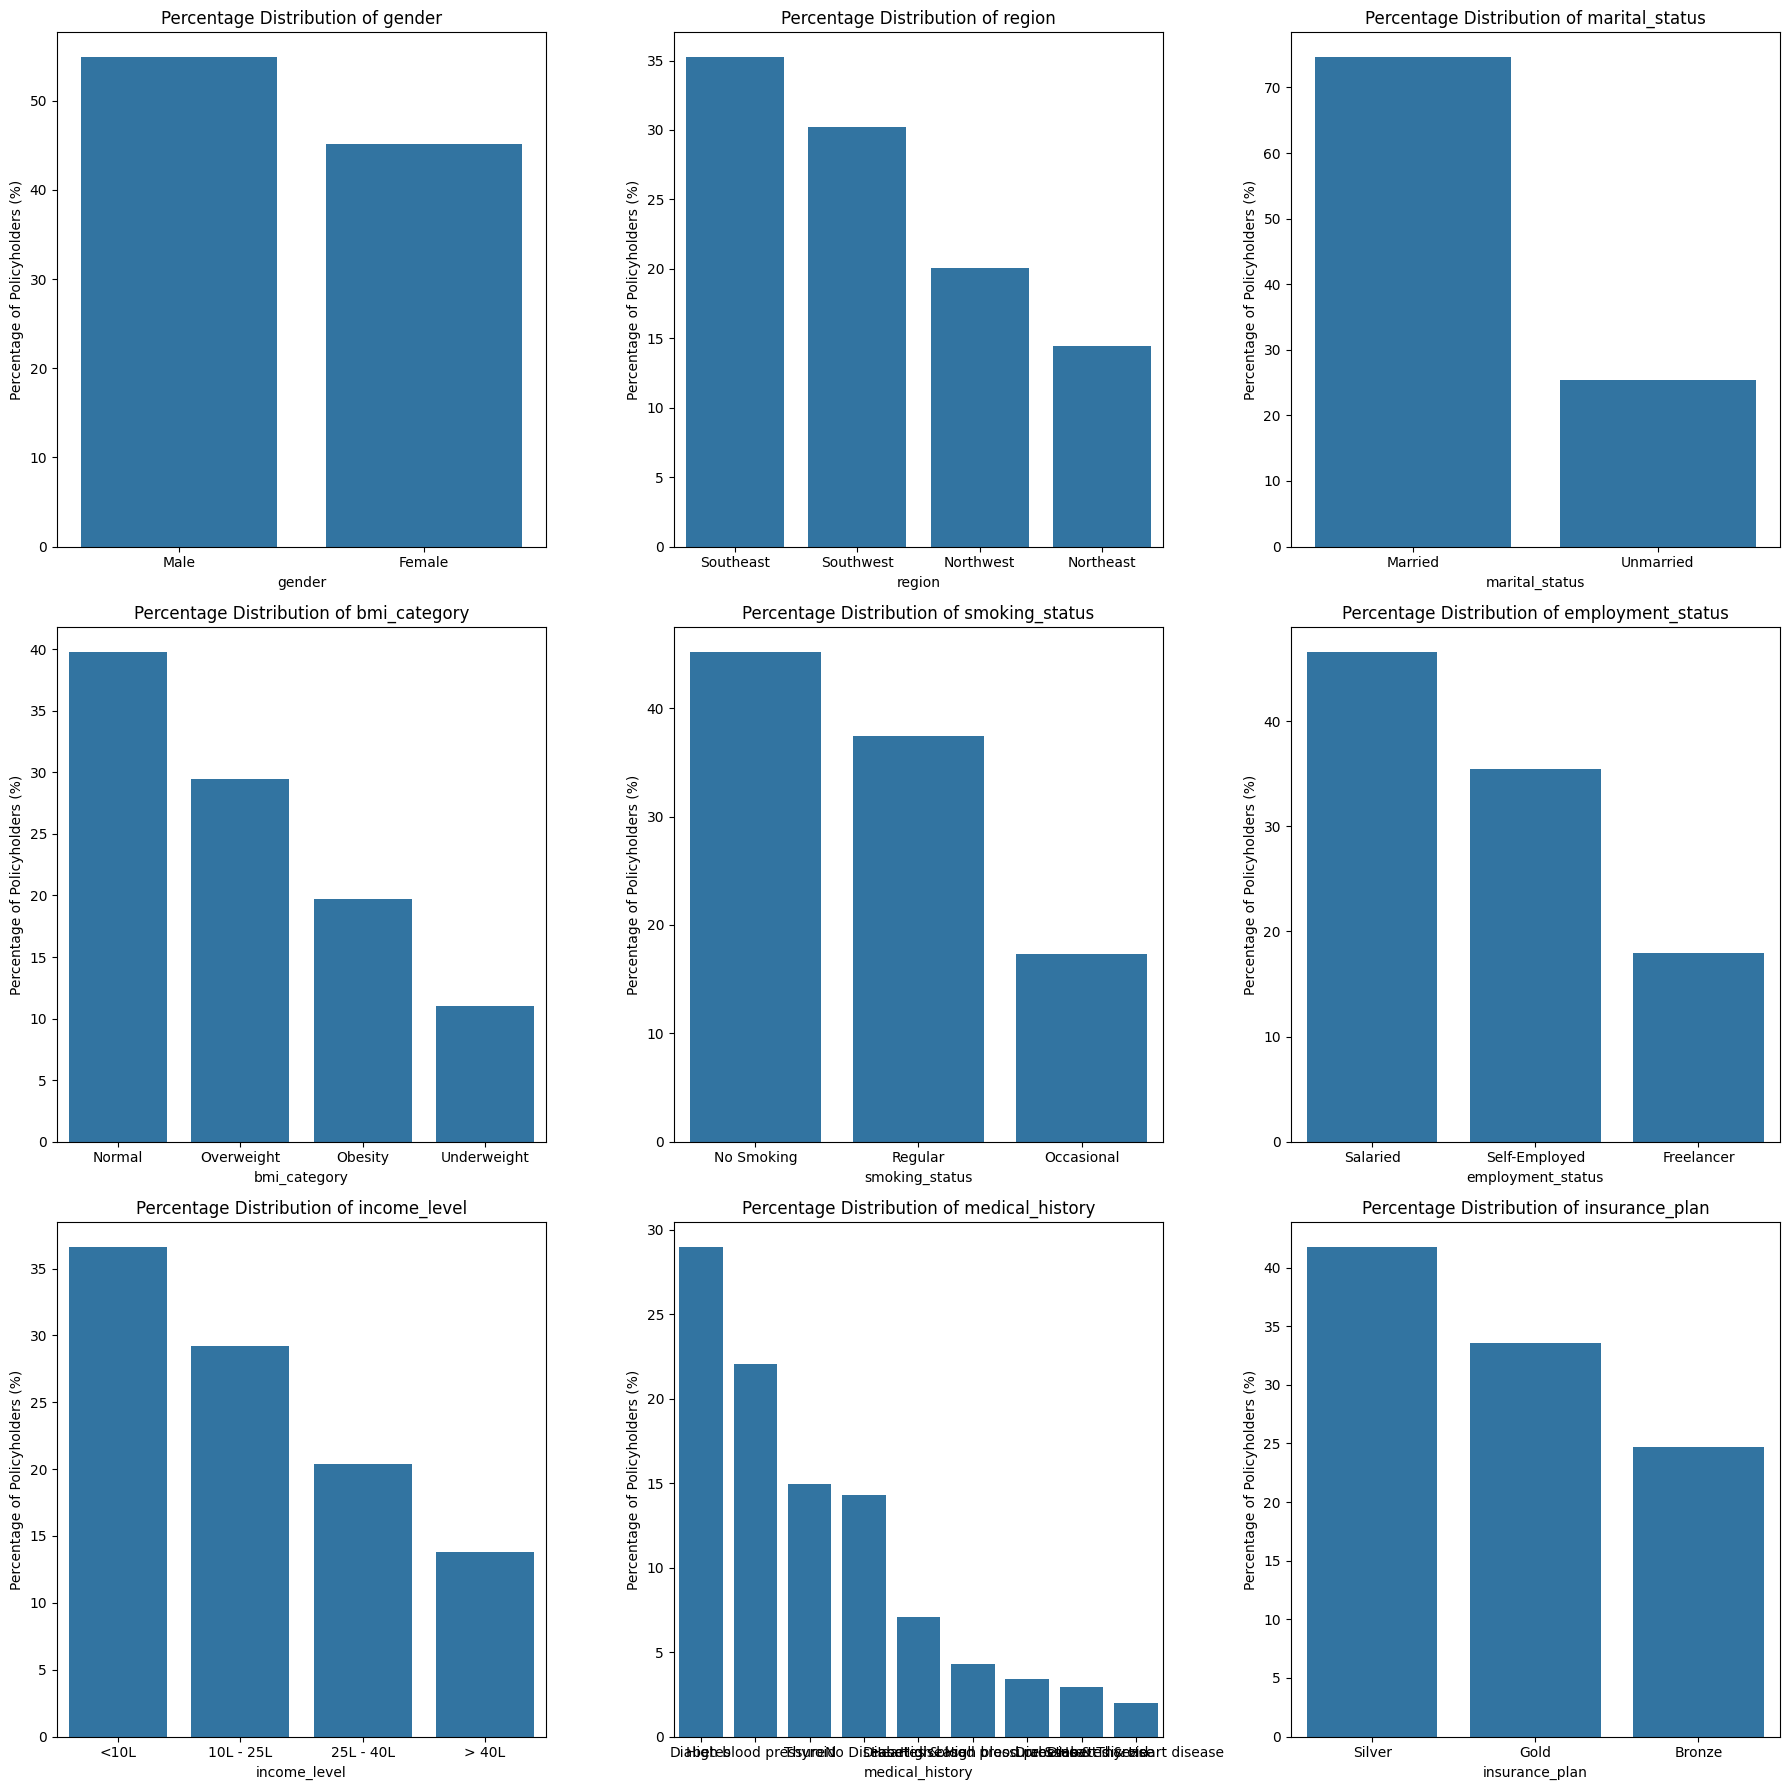

In [129]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


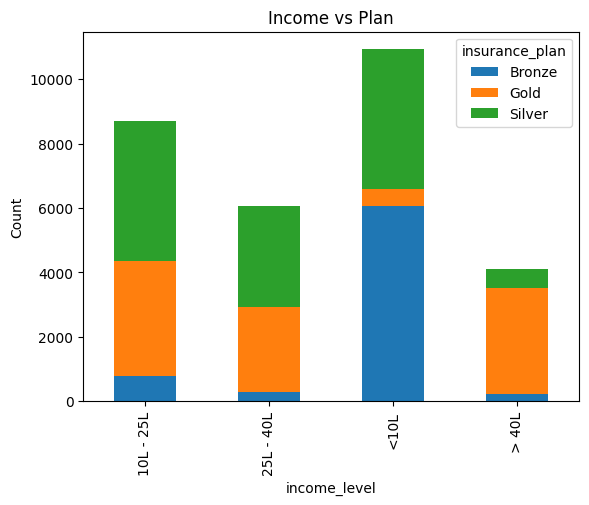

In [130]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

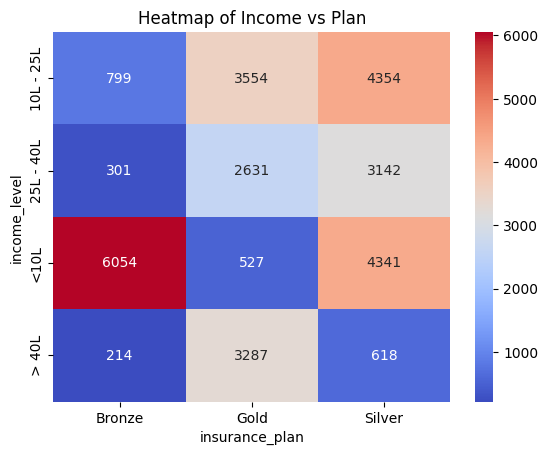

In [131]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

### Feature Engineering

In [132]:
df2.sample(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
22510,69,Female,Southeast,Unmarried,0,Normal,No Smoking,Self-Employed,10L - 25L,25,High blood pressure,Gold,32910,0
20393,58,Male,Northeast,Married,4,Overweight,No Smoking,Self-Employed,25L - 40L,35,Diabetes & Heart disease,Gold,32979,0


In [133]:
df2["medical_history"].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [134]:
risk_score = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}

In [135]:
df2[["disease1", "disease2"]] = df2["medical_history"].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
17260,57,Female,Northwest,Unmarried,1,Obesity,No Smoking,Self-Employed,<10L,2,Diabetes,Silver,22597,0,diabetes,None
19091,42,Male,Southeast,Married,2,Overweight,Occasional,Salaried,<10L,1,High blood pressure & Heart disease,Bronze,16601,0,high blood pressure,heart disease
24776,63,Female,Northeast,Unmarried,0,Underweight,No Smoking,Self-Employed,<10L,3,High blood pressure,Bronze,13099,0,high blood pressure,None
25698,63,Male,Northwest,Married,1,Normal,No Smoking,Self-Employed,25L - 40L,27,High blood pressure,Gold,32174,0,high blood pressure,None
15641,31,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,10L - 25L,21,Diabetes,Silver,15870,0,diabetes,None


In [136]:
df2["disease1"] = df2["disease1"].fillna("none")
df2["disease2"] = df2["disease2"].fillna("none")
df2["total_risk_score"] = 0

for disease in ["disease1", "disease2"]:
    df2["total_risk_score"] += df2[disease].map(risk_score)

max_score = df2["total_risk_score"].max()
min_score = df2["total_risk_score"].min()
df2["normalized_risk_score"] = (df2["total_risk_score"] - min_score) / (max_score - min_score)
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
25727,52,Female,Northwest,Married,2,Underweight,No Smoking,Self-Employed,10L - 25L,23,No Disease,Bronze,9422,0,no disease,none,0,0.000000
7371,39,Male,Southeast,Married,3,Overweight,Regular,Salaried,10L - 25L,17,High blood pressure & Heart disease,Silver,24170,0,high blood pressure,heart disease,14,1.000000
13648,41,Female,Northwest,Married,3,Underweight,No Smoking,Salaried,<10L,4,Thyroid,Bronze,9674,0,thyroid,none,5,0.357143
21975,40,Female,Southwest,Unmarried,2,Obesity,No Smoking,Freelancer,> 40L,99,Diabetes & Heart disease,Gold,29655,0,diabetes,heart disease,14,1.000000
17702,40,Female,Southeast,Unmarried,1,Normal,Regular,Salaried,<10L,4,High blood pressure & Heart disease,Bronze,16501,0,high blood pressure,heart disease,14,1.000000


In [137]:
df2["insurance_plan"].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [138]:
df2["insurance_plan"] = df2["insurance_plan"].map({"Bronze": 1, "Silver": 2, "Gold": 3})
df2["insurance_plan"].unique()

array([1, 2, 3], dtype=int64)

In [139]:
df2["income_level"] = df2["income_level"].map({"<10L": 1, "10L - 25L": 2, "25L - 40L": 3, "> 40L": 4})
df2["income_level"].unique()

array([1, 2, 4, 3], dtype=int64)

In [140]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
3300,67,Male,Southeast,Married,1,Normal,No Smoking,Salaried,2,22,Thyroid,3,32910,0,thyroid,none,5,0.357143
28532,36,Female,Southeast,Married,5,Normal,No Smoking,Salaried,1,6,Diabetes,1,9079,0,diabetes,none,6,0.428571
14907,26,Female,Northwest,Unmarried,2,Underweight,No Smoking,Salaried,4,80,Thyroid,3,22626,0,thyroid,none,5,0.357143
17665,36,Male,Southeast,Married,4,Normal,Regular,Salaried,3,35,Diabetes & Heart disease,2,22321,0,diabetes,heart disease,14,1.000000
22228,28,Male,Northwest,Married,2,Overweight,Regular,Salaried,2,15,Diabetes,2,20568,0,diabetes,none,6,0.428571


In [141]:
nominal_cols = ["gender", "region", "marital_status", "bmi_category", "smoking_status", "employment_status"]
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.sample(5)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10754,33,5,2,24,Diabetes,2,17965,0,diabetes,none,...,0,0,0,0,1,0,0,0,1,0
29900,40,0,2,16,Diabetes & Thyroid,3,29496,0,diabetes,thyroid,...,1,0,1,0,1,0,0,1,1,0
27937,31,0,3,33,No Disease,1,10384,0,no disease,none,...,0,1,1,0,1,0,1,0,0,1
1517,35,3,3,34,Diabetes,2,19008,0,diabetes,none,...,0,0,0,0,0,0,0,1,0,0
25178,37,3,2,24,No Disease,3,23402,0,no disease,none,...,0,0,0,0,1,0,1,0,1,0


In [142]:
df4 = df3.drop(["medical_history", "disease1", "disease2", "total_risk_score"], axis=1)
df4.sample(5)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
18777,28,4,4,81,3,19744,0,0.000000,1,0,1,0,0,0,0,0,0,0,1,0
20517,40,4,1,1,1,13782,0,1.000000,0,0,0,1,0,0,0,0,1,0,1,0
25704,26,4,2,13,2,15625,0,0.428571,0,0,1,0,0,0,0,0,0,0,0,0
26329,26,0,1,5,2,21659,0,1.000000,1,0,0,1,1,0,1,0,0,0,1,0
25979,67,2,2,20,3,32398,0,0.357143,0,0,1,0,0,0,0,0,0,0,0,0


In [143]:
df4.shape

(29822, 20)

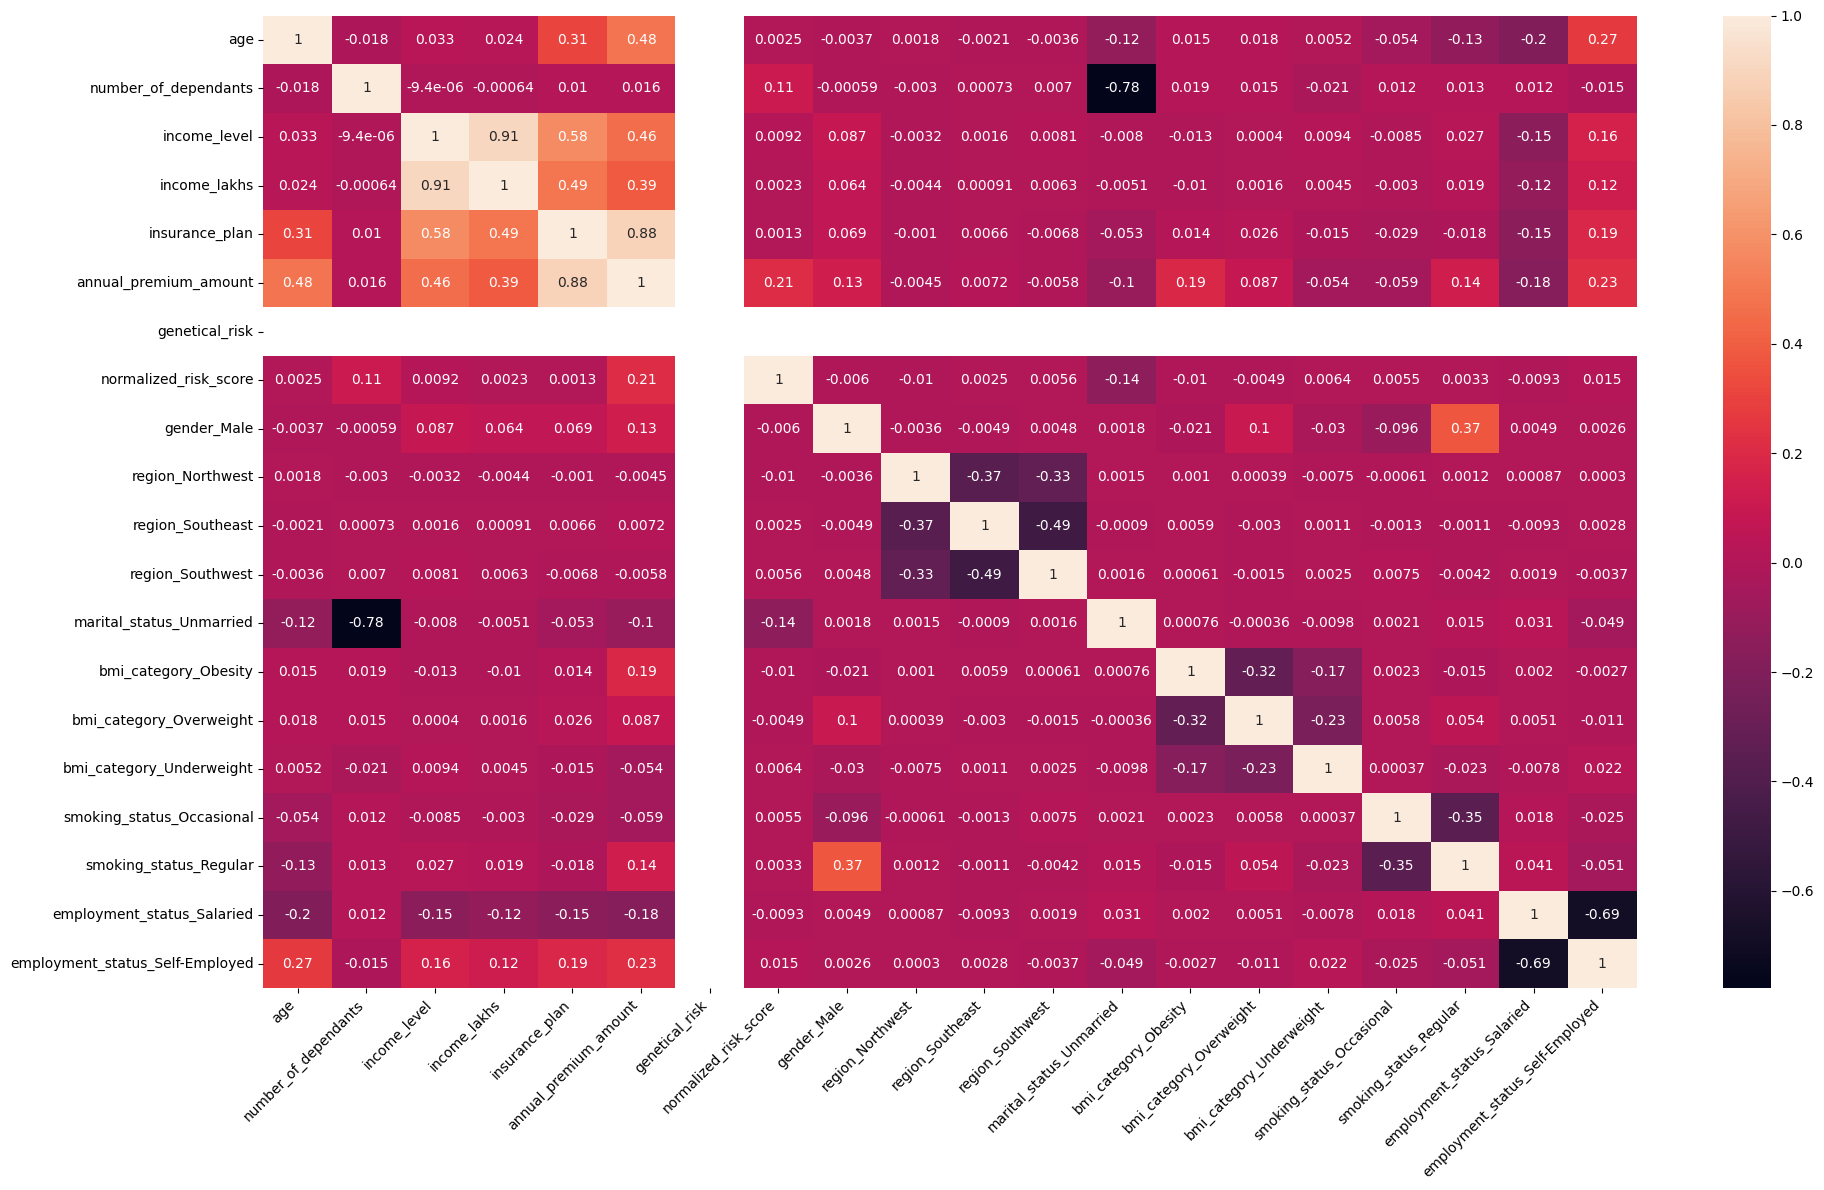

In [144]:
cm = df4.corr()

plt.figure(figsize= (20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [145]:
X = df4.drop(["annual_premium_amount"], axis=1)
y = df4["annual_premium_amount"]

In [146]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ["age", "number_of_dependants", "income_level", "income_lakhs", "insurance_plan", "genetical_risk"]
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [148]:
calculate_vif(X)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [149]:
calculate_vif(X.drop(["income_level"], axis=1))

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [150]:
X_reduced = X.drop(["income_level"], axis=1)
X_reduced.sample(5)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
7820,0.652174,0.8,0.232323,0.0,0.0,0.428571,1,0,0,1,0,1,0,0,0,1,1,0
10300,0.673913,0.0,0.242424,1.0,0.0,0.428571,1,0,1,0,1,0,1,0,0,1,1,0
4847,0.500000,1.0,0.060606,0.5,0.0,0.428571,0,1,0,0,0,0,0,0,0,0,1,0
26100,0.347826,0.4,0.080808,0.5,0.0,0.428571,1,0,0,0,0,0,1,0,0,1,1,0
4002,0.195652,0.8,0.202020,0.5,0.0,0.000000,1,0,1,0,0,0,1,0,0,1,1,0


### Model Training

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3, random_state = 10)

print(f"X train {X_train.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y test {y_test.shape}")

X train (20875, 18)
X test (8947, 18)
Y train (20875,)
Y test (8947,)


In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.9534163989489616, 0.9538448451629948)

In [154]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print(f"Linear Regression ==> MSE: {mse_lr} RMSE: {rmse_lr}")

Linear Regression ==> MSE: 2183844.360312456 RMSE: 1477.7835972538253


In [155]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([ 7016.239328, -1311.764702,  -708.193369, 14835.988208,
           0.      ,  6053.624123,    37.558269,   -55.250872,
         -19.622543,   -22.289676,  -700.3202  ,  3926.812706,
        1979.456047,   612.866236,   837.395101,  2800.661843,
         -45.491367,   243.078421])

In [156]:
model_lr.intercept_, model_lr.coef_

(5935.981289344609,
 array([ 7016.239328, -1311.764702,  -708.193369, 14835.988208,
            0.      ,  6053.624123,    37.558269,   -55.250872,
          -19.622543,   -22.289676,  -700.3202  ,  3926.812706,
         1979.456047,   612.866236,   837.395101,  2800.661843,
          -45.491367,   243.078421]))

In [157]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index = X_test.columns, columns = ["Coefficients"])
coef_df = coef_df.sort_values(by = "Coefficients", ascending=True)
coef_df

,Coefficients
number_of_dependants,-1311.764702
income_lakhs,-708.193369
marital_status_Unmarried,-700.320200
region_Northwest,-55.250872
employment_status_Salaried,-45.491367
region_Southwest,-22.289676
region_Southeast,-19.622543
genetical_risk,0.000000
gender_Male,37.558269
employment_status_Self-Employed,243.078421


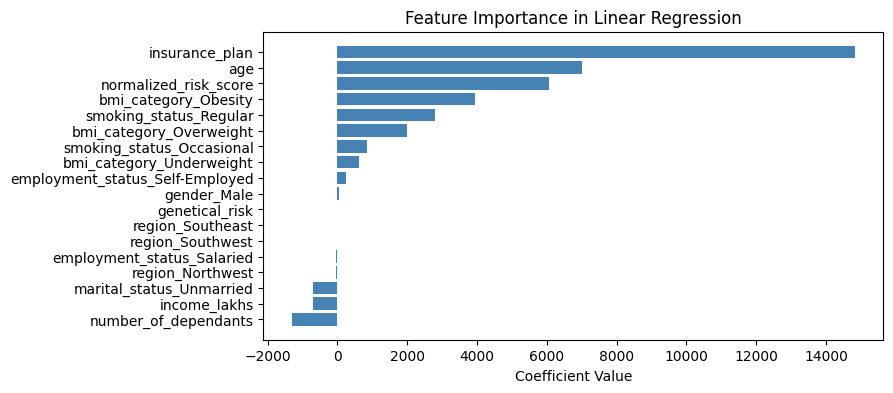

In [158]:
plt.figure(figsize= (8, 4))
plt.barh(coef_df.index, coef_df["Coefficients"], color="steelblue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [159]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
train_score = model_rg.score(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score, test_score

(0.9534162332209687, 0.9538456995663842)

In [160]:
y_pred = model_rg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Ridge Regression ==> MSE:  2183803.9339715634 RMSE:  1477.769919159124


In [161]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score, test_score

(0.9949295520782471, 0.9948463439941406)

In [162]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print(f"XGBoost Regression ==> MSE: {mse_xgb} RMSE: {rmse_xgb}")

XGBoost Regression ==> MSE: 243847.765625 RMSE: 493.80944262437913


In [163]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9970577955245972

In [164]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [165]:
best_model = random_search.best_estimator_

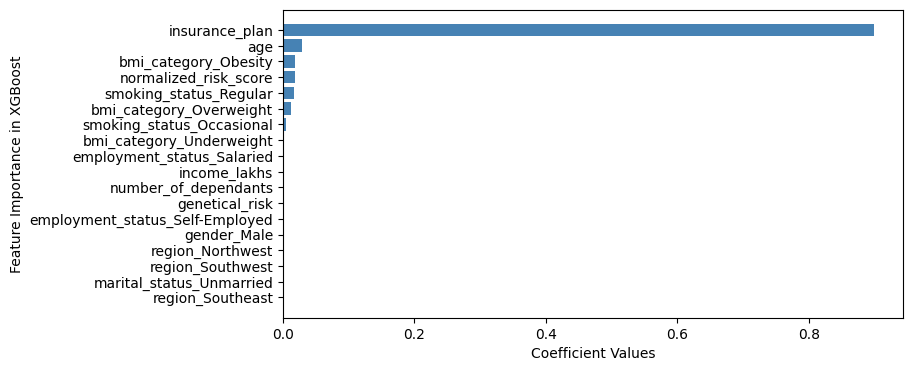

In [166]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index= X_train.columns, columns=["Coefficients"])
coef_df = coef_df.sort_values(by = "Coefficients", ascending= True)

plt.figure(figsize = (8, 4))
plt.barh(coef_df.index, coef_df["Coefficients"], color= "steelblue")
plt.xlabel("Coefficient Values")
plt.ylabel("Feature Importance in XGBoost")
plt.show()

### Error Analysis

In [167]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals * 100 / y_test

result_df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred,
    "diff": residuals,
    "diff_pct": residuals_pct
})

result_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


<Axes: xlabel='diff_pct', ylabel='Count'>

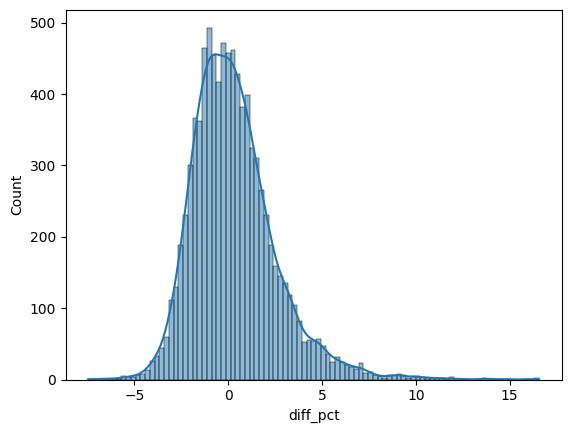

In [168]:
sns.histplot(result_df["diff_pct"], kde = True)

In [169]:
extreme_error_thresold = 10

extreme_result_df = result_df[np.abs(result_df["diff_pct"]) > extreme_error_thresold]

In [170]:
extreme_result_df.shape

(29, 4)

In [171]:
result_df.shape

(8947, 4)

In [172]:
extreme_error_pct = extreme_result_df.shape[0] * 100 / result_df.shape[0]
extreme_error_pct

0.32413099362914943

In [173]:
X_test.index

Index([19713, 14750, 19932, 29643, 17076, 20314, 24893, 26722, 25844, 10731,
       ...
       10637,  1224, 17046, 19228,  9275,  3387,  7858,  9744,  4849,  8986],
      dtype='int64', length=8947)

In [174]:
extreme_result_df.index

Index([14286, 27518,  9285,  7547, 21910, 12189, 21141, 16263,  8216, 13973,
        9150, 24145, 18522,  6163, 18681, 19145, 21455, 22666,  7508, 10741,
        6517, 18834, 13744, 24119,  2695, 25658, 11019, 14037,  7654],
      dtype='int64')

In [175]:
extreme_error_df =  X_test.loc[extreme_result_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14286,0.021739,0.6,0.050505,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
27518,0.304348,0.6,0.080808,0.0,0.0,0.357143,1,1,0,0,0,0,0,0,0,0,0,1
9285,0.326087,0.6,0.010101,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
7547,0.347826,0.2,0.080808,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
21910,0.043478,0.6,0.020202,0.0,0.0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0


### Export model to file

In [176]:
from joblib import dump

In [177]:
dump(best_model, "./artifacts/model_rest.joblib")

['./artifacts/model_rest.joblib']

In [178]:
scaler_with_cols = {
    "scaler": scaler,
    "cols_to_scale": cols_to_scale
}
scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}

In [179]:
dump(scaler_with_cols, "./artifacts/scaler_rest.joblib")

['./artifacts/scaler_rest.joblib']